<a href="https://colab.research.google.com/github/DRAGOX7/ml-projects/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
df.shape

(1338, 7)

In [ ]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:

Sex<br>
Smoker<br>
Region

In [ ]:
# checking for missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


data analysis

In [ ]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


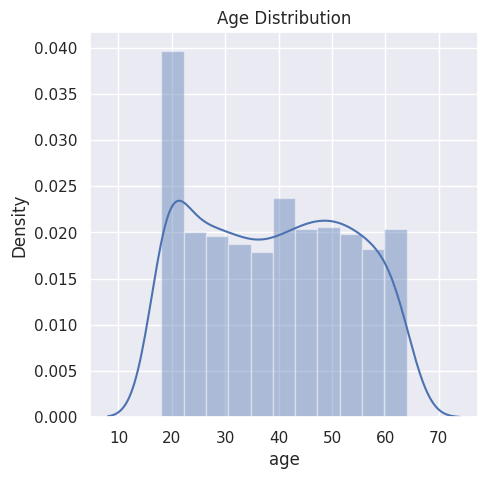

In [ ]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

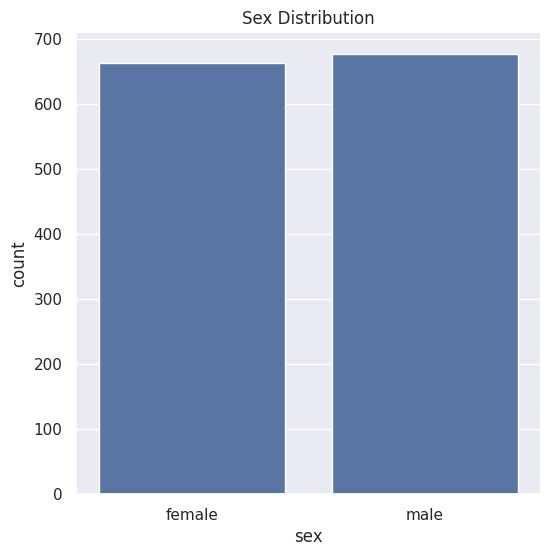

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

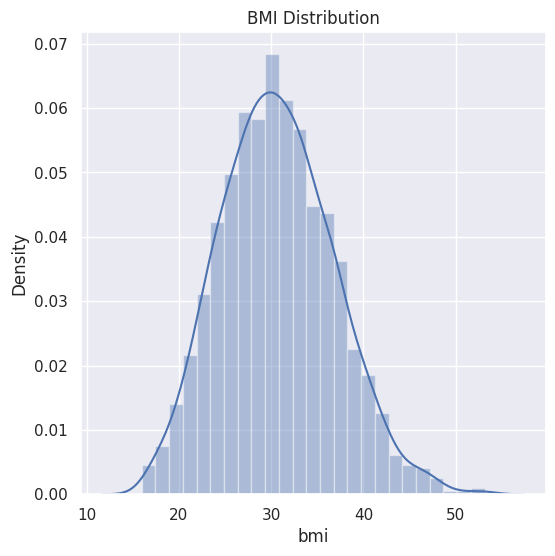

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

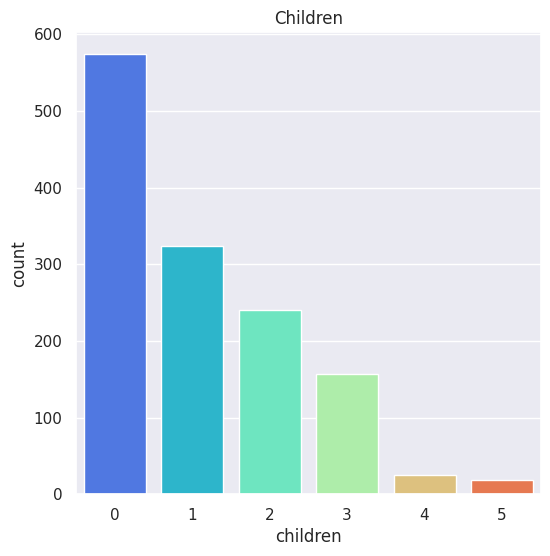

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df,palette="rainbow")
plt.title('Children')
plt.show()

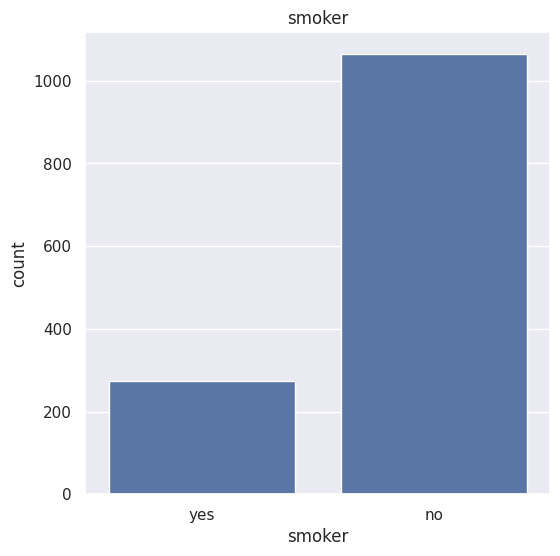

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

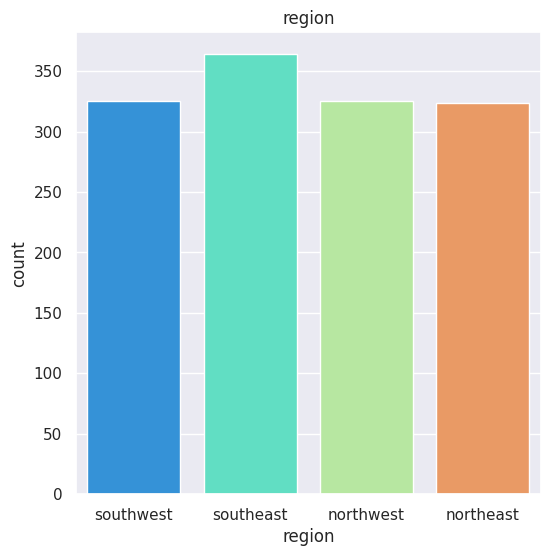

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df,palette="rainbow")
plt.title('region')
plt.show()

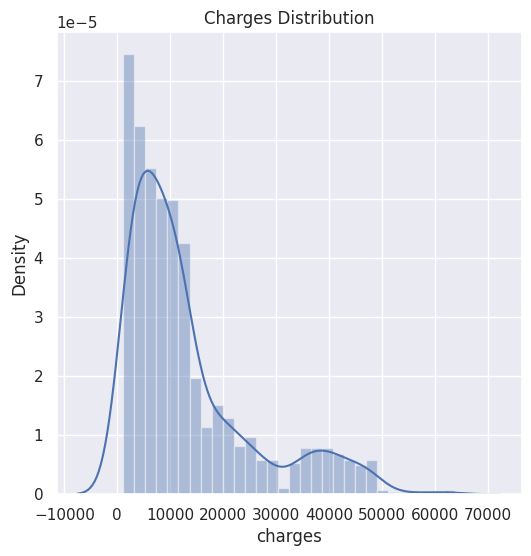

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

data preproccesing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


splitting

In [ ]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

Splitting the data into Training data & Testing Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


model training

In [ ]:
# loading the Linear Regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

model evaluation

In [ ]:
# prediction on training data
training_data_prediction =regressor.predict(x_train)

In [ ]:
#r2
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.7519923667088932


In [ ]:
#prediction on test set
test_data_prediction =regressor.predict(x_test)

In [ ]:
r2_test=metrics.r2_score(y_test,test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)


R Squared value =  0.7445422986536503


Building a Predictive System



In [ ]:
input_data = (31,1,25.74,0,1,0)
#converting to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#prediction
predict=regressor.predict(input_data_reshaped)
print(predict)
print('The insurance cost is USD ', predict[0])

[182255.25773326]
The insurance cost is USD  182255.25773326488
